<a href="https://colab.research.google.com/github/Untick/IrisID_gr2/blob/Gaidash-Alexey-folder/Gaidash%20Aleksey/%D0%98%D0%B4%D0%B5%D0%BD%D1%82%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D0%B0%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%BF%D0%BE_%D1%80%D0%B0%D0%B4%D1%83%D0%B6%D0%BD%D0%BE%D0%B9_%D0%BE%D0%B1%D0%BE%D0%BB%D0%BE%D1%87%D0%BA%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разработка нейронной сети для идентификации пациентов по радужной оболочке

### При разработке нейроннной сети целью которой является идентификация по радужной оболочке глаза необходимо предобработать изображения глаз пациентов, спроектировать и обучить нейроную сеть.

Предобработка изображений включает в себя приведение всех ихображений к единному оптимальному размеру всех изображений с целью снизить нагрузку при обучении нейронной сети.

Для разработки нейронной сети, а также предобработке данных и выводов результатов будет использоваться язык программирования Phyton и некоторые дополнительные библиотеки.

### Приступим к предобработке изображений

In [1]:
# Подключим библиотеки

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

from PIL import Image;
import zipfile;
import shutil;
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

#### Загрузим архив с фотографиями и распакуем его

In [2]:
# Загрузка базы изображений из облака
import gdown
gdown.download('https://drive.google.com/uc?id=1ZAXRuE6ly8nJG-eGFTkD9Pn663ihCedB', None, quiet=True)

'Iris_ID.zip'

In [3]:
# Распаковываем архив Iris_ID.zip в папку Iris_ID
!unzip -q Iris_ID.zip

#### Подготовим исходные данные для обучения нейронной сети

Подготовка данный происходить путём перебора изображений из распакованного архива. Далее под каждую группу фотографий создаётся его собственная дректория в которую складваются фотографии его глаз. Название директории соответствует классу присвоенному группе фотографий.

In [4]:
# Распакуем вложенные архивы
# Путь к директории с базой изображений
base_dir = '/content/Iris_ID';
dataset_dir = 'dataset';
labels = [];
train_dir = '/content/train'

for path in os.listdir(base_dir):
  with zipfile.ZipFile(base_dir + '/' + path, 'r') as zip_ref:
    name_zip = dataset_dir + '/' + path.split('.')[0];
    zip_ref.extractall(name_zip);

    for n in os.listdir(name_zip):
      d_name = train_dir + '/' + n[:-6];
      if os.path.exists(d_name) == False:
        os.makedirs(d_name);

      labels.append(n[:-6]);
      shutil.move(name_zip + '/' + n, d_name);

#### Выполним предобработку изображений.

Предобработка происходит следующим образом - перебираем созданные директории с группами фотографий, изменяем размер исходной фотографии до нужного нам - 100х100 и помещаем эти изображения в массив попутно помещаем метку фотографии в другой массив для связи при обучении.

In [5]:
# Путь к распакованым изображений
datasetPath = '/content/train';

x_train = [];
y_train = [];
NUM_CLASSES = 0;

# Изображения будут размером 100х100 px
IMG_WIDTH = 100;
IMG_HEIGHT = 100;

Dirs = os.listdir(datasetPath);

# Перебираем каждую директорию
for dir in Dirs:
  # Преобразовываем каждую картинку в массив байт
  for img in os.listdir(datasetPath + '/' + dir):
    i = Image.open(datasetPath + '/' + dir + '/' + img);
    i = i.resize((IMG_WIDTH, IMG_HEIGHT));
    np_arr = np.array(i);
    x_train.append(np_arr);
    y_train.append(NUM_CLASSES);

  NUM_CLASSES = NUM_CLASSES + 1;

# Преобразование в numpy-массив загруженных изображений и меток классов, а также
# категоризацция меток

# Нормированние массива изображений
x_train = np.array(x_train);

# отберём 10% на валидационную выборку
index = int(len(x_train) / 10);
x_val = x_train[-index:];
x_val = np.array(x_val);

y_val = y_train[-index:];

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_train = np.array(y_train);

y_val = utils.to_categorical(y_val, NUM_CLASSES);
y_val = np.array(y_val);

rand = list(zip(x_val, y_val))
random.shuffle(rand)
x_val, y_val = zip(*rand)

x_val = np.array(x_val)
y_val = np.array(y_val)

# Вывод размерностей
print('Размер массива x_train', x_train.shape);
print('Размер массива y_train', y_train.shape);
print('Размер массива x_val', x_val.shape);
print('Размер массива y_val', y_val.shape);

Размер массива x_train (384, 100, 100, 3)
Размер массива y_train (384, 128)
Размер массива x_val (38, 100, 100, 3)
Размер массива y_val (38, 128)


Таким образом получилось 384 изображения размером 100 х 100 px и 3 канала цвета.
Всего получилось 128 классов изображений.
На валидационную выборку было выделено 10% от общего объёма изображений.

#### Выведем некоторые изображения что бы убедиться в корректности сопоставления метки класа и изображение

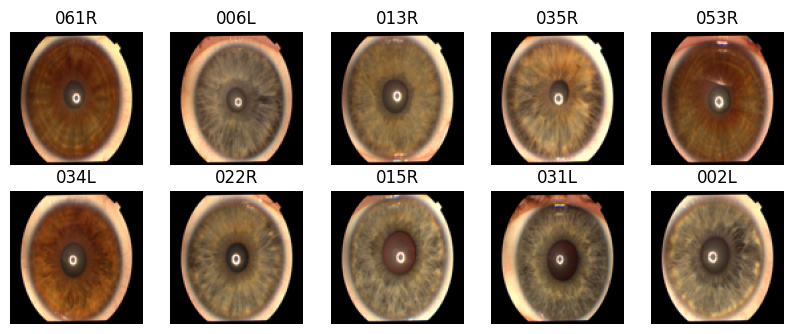


Выведем несколько картоник с метками из валидацианной выборки



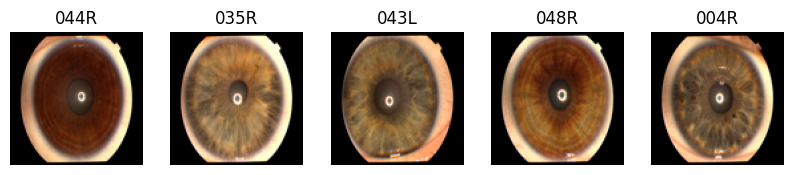

In [6]:
# Примеры картинок с метками
fig = plt.figure(figsize=(10,10))

for i in range(10):
    n = np.random.randint(0 , x_train.shape[0])
    img = x_train[n];
    ax = fig.add_subplot(5, 5, i+1);
    label = Dirs[np.argmax(y_train[n])];
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show();

print();
print("Выведем несколько картоник с метками из валидацианной выборки");
print();

fig = plt.figure(figsize=(10,10))

for i in range(5):
  n = np.random.randint(0 , x_val.shape[0])
  imageData = x_val[n];
  ax = fig.add_subplot(5, 5, i+1);
  label = Dirs[np.argmax(y_val[n])];
  ax.set_title(label)
  ax.imshow(imageData)
  ax.axis('off')
plt.show();

#### Создадим и скомпилируем нейронную сеть

Нейроная сеть состоит из девяти слоёв

1, 3, 6 слои Conv2D - свёрточные слои

2, 5 слои используются для ускорения и повышения стабильности обучения



In [7]:
from tensorflow.keras.models import Sequential;

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization;

model = Sequential();
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)));
model.add(BatchNormalization());
model.add(Conv2D(256, (3, 3), strides = (3,3), padding='same', activation='relu'));
model.add(MaxPooling2D(pool_size=(3, 3)));
model.add(BatchNormalization());
model.add(Conv2D(128, (3, 3), strides = (3,3), padding='valid', activation='relu'));
model.add(MaxPooling2D(pool_size=(3, 3)));
model.add(Flatten());
model.add(Dense(NUM_CLASSES, activation='softmax'));
print(model.summary());

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 512)     14336     
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 512)    2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 256)       1179904   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 256)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

Скомпилируем нейронную сеть

In [8]:
# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy']);

#### Проведём обучение нейронной сети с сохранением историю обучения для отображения графика обучения

За основу возьмём 25 эпох обучения и количество элементов выборки до изменения вестов равным 50

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=50, epochs=25, verbose=1);

Epoch 1/25
8/8 [==============================] - 142s 17s/step - loss: 5.9374 - accuracy: 0.0104 - val_loss: 109.3521 - val_accuracy: 0.0000e+00
Epoch 2/25
8/8 [==============================] - 124s 16s/step - loss: 4.8786 - accuracy: 0.0026 - val_loss: 68.5483 - val_accuracy: 0.0000e+00
Epoch 3/25
8/8 [==============================] - 125s 16s/step - loss: 4.3448 - accuracy: 0.0755 - val_loss: 49.1344 - val_accuracy: 0.0263
Epoch 4/25
8/8 [==============================] - 130s 16s/step - loss: 3.8192 - accuracy: 0.1562 - val_loss: 47.5261 - val_accuracy: 0.0263
Epoch 5/25
8/8 [==============================] - 127s 16s/step - loss: 3.2678 - accuracy: 0.2500 - val_loss: 34.1305 - val_accuracy: 0.0526
Epoch 6/25
8/8 [==============================] - 133s 17s/step - loss: 2.6204 - accuracy: 0.4036 - val_loss: 30.7301 - val_accuracy: 0.0263
Epoch 7/25
8/8 [==============================] - 131s 16s/step - loss: 2.0491 - accuracy: 0.5417 - val_loss: 19.6750 - val_accuracy: 0.0526
Epoc

## Выведим результаты обучения в график

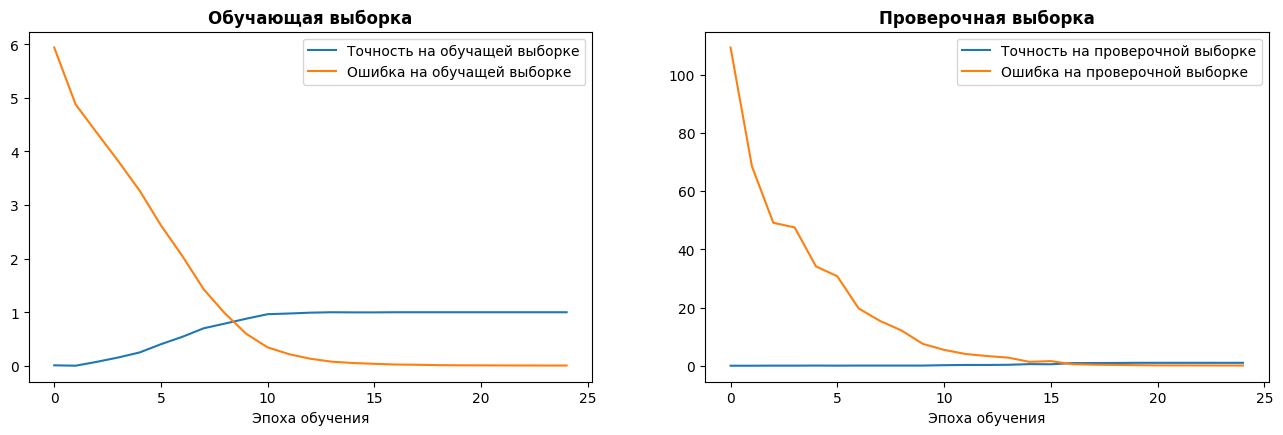

In [10]:
plt.figure(figsize=(16, 10));

plt.subplot(2, 2, 1);
plt.title('Обучающая выборка', fontweight='bold');
plt.plot(history.history['accuracy'], label='Точность на обучащей выборке');
plt.plot(history.history['loss'], label='Ошибка на обучащей выборке');
plt.xlabel('Эпоха обучения');
plt.legend()

plt.subplot(2, 2, 2);
plt.title('Проверочная выборка', fontweight='bold');
plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке');
plt.plot(history.history['val_loss'], label='Ошибка на проверочной выборке');
plt.xlabel('Эпоха обучения');
plt.legend();

plt.show();

## Проанализируем результаты обучения

По результатам обучения видно что точность на обучающей выборке начинает ощютимо возрастать примерно к шестой эпохе, а ошибка постепенно уменьшается. Что является непосредственным индекатором обучения сети.

На проверочной выборке мы видим что точность начинает увеличиваться примерно к тринадцатой - четырнадцатой эпохе и к концу обучения достигает 100%. График ошибки на проверочной выборке стремится к минимуму и к концу обучения находится в своей минимальной точке.

Для наглядности выведим результаты разпознования из проверочной выборки детально.

In [11]:
predictions = np.argmax(model.predict(x_val), axis=1)
y_test_nums = np.argmax(y_val, axis=1)

for i in range(len(x_val)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

2/2 [==============================] - 4s 597ms/step
Предсказано - 121, было 121, True
Предсказано - 122, было 122, True
Предсказано - 124, было 124, True
Предсказано - 127, было 127, True
Предсказано - 123, было 123, True
Предсказано - 122, было 122, True
Предсказано - 126, было 126, True
Предсказано - 124, было 124, True
Предсказано - 125, было 125, True
Предсказано - 119, было 119, True
Предсказано - 117, было 117, True
Предсказано - 124, было 124, True
Предсказано - 117, было 117, True
Предсказано - 121, было 121, True
Предсказано - 118, было 118, True
Предсказано - 123, было 123, True
Предсказано - 126, было 126, True
Предсказано - 116, было 116, True
Предсказано - 127, было 127, True
Предсказано - 126, было 126, True
Предсказано - 120, было 120, True
Предсказано - 127, было 127, True
Предсказано - 115, было 115, True
Предсказано - 118, было 118, True
Предсказано - 117, было 117, True
Предсказано - 119, было 119, True
Предсказано - 120, было 120, True
Предсказано - 115, было 115, 

Из результатов вывода можно заметить что по всем изображениям из проверочной выборки обученая нейросеть ответила верно

Для более детального понимания верных ответов отобразим результат в матрице ошибок для  более детального анализа верный и не верных ответов

12/12 [==============================] - 37s 3s/step


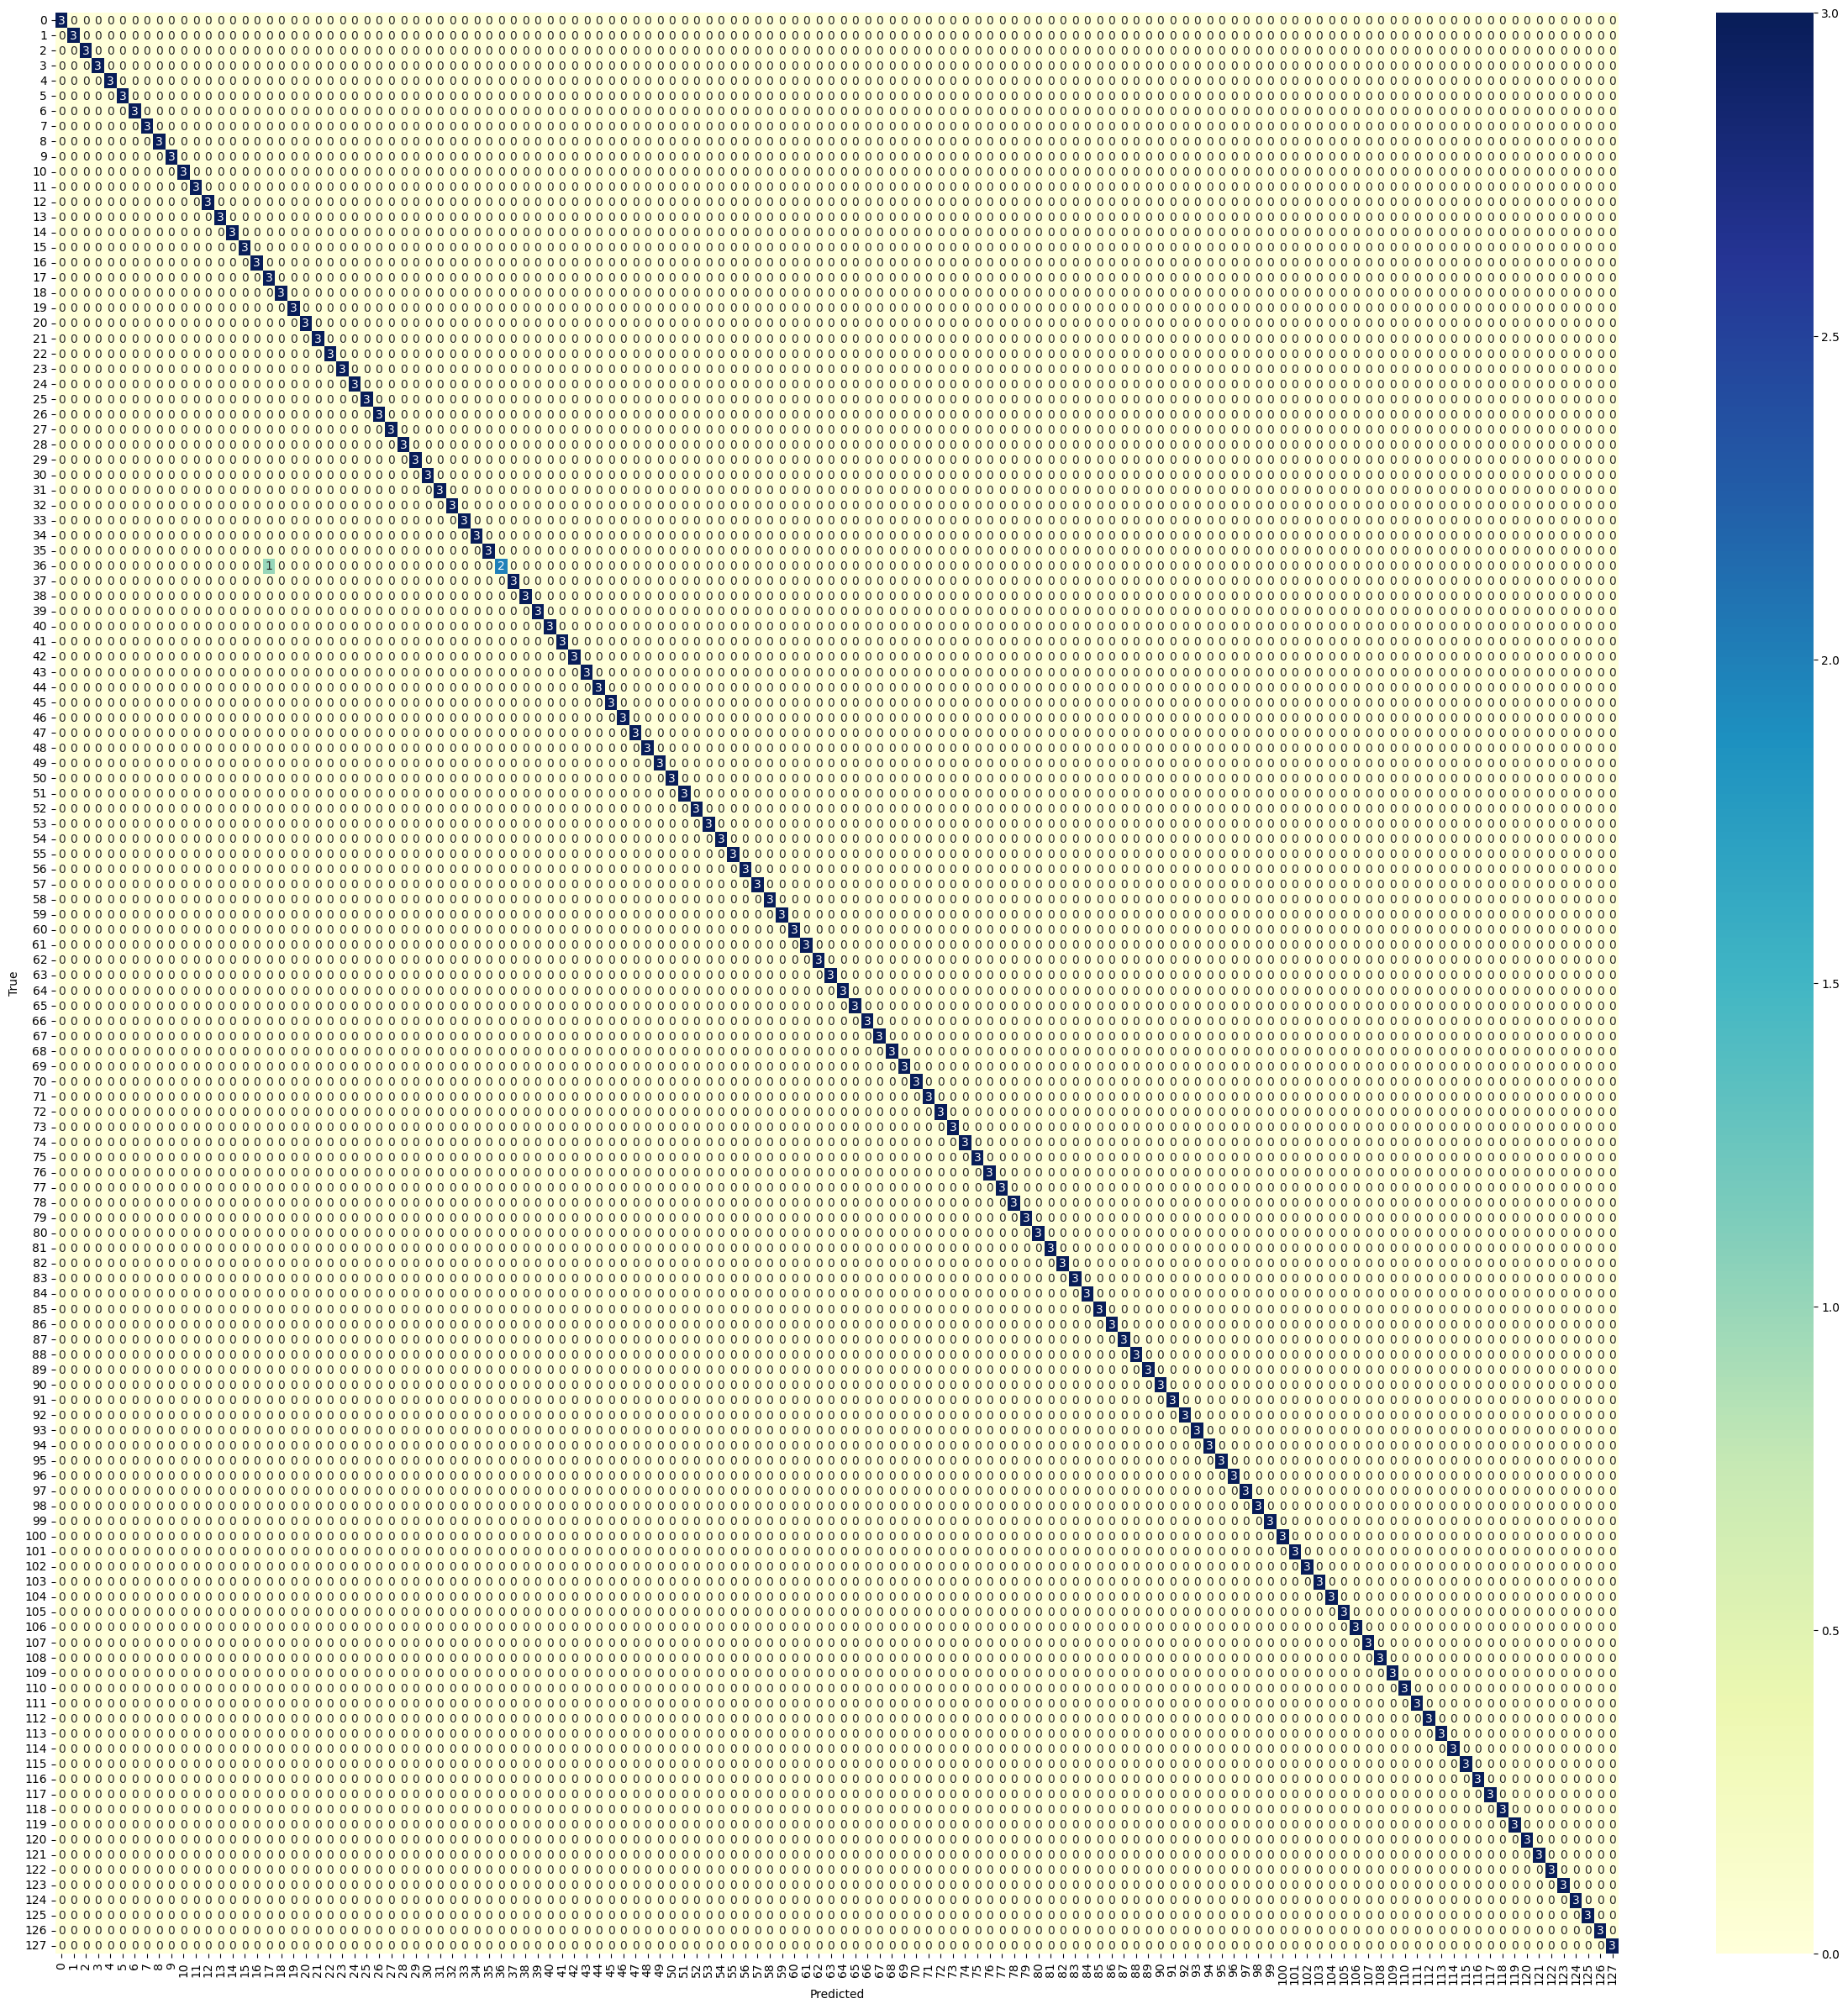

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

y_predict = model.predict(x_train);
y_test_classes = [tf.argmax(y_train[i]).numpy() for i in range(len(y_train))]
y_predict_classes = [tf.argmax(y_predict[i]).numpy() for i in range(len(y_predict))]

plt.figure(figsize=(30,30))
confusion_mtx = confusion_matrix(y_test_classes, y_predict_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Из результатов матрицы ошибок видно что нейросеть лишь в некоторых случаях единоразово предсказывает не верные результаты.

Пересечение 36-36 нейросеть распознала верно два раза из трёх и один раз распознала как 17 класс.

## Сохраним модель для дальнейшего дообучения

In [14]:
# сохраним модель нейронной сети
model.save('saved_model.h5');

# Дообучение модели

## При дообучении модели использовался новый архив с фотографиями других пациентов.

Чтобы дообучить модель на новых данных необходимо предобработать новые изображения и привести их к параметром первичного обучения модели

### Загрузим новые изображения и распакуем архив

In [15]:
%matplotlib inline

# Загрузка датасета из облака
import gdown
gdown.download('https://drive.google.com/uc?id=1CUe9HZAsGQPCqySZX7zuyJDiS3fqpyBc&authuser', None, quiet=True)

'1920x1080.zip'

In [16]:
# Распаковываем архив Iris_ID.zip в папку Iris_ID
!unzip -q 1920x1080.zip

### Подготовка данных для дообучения модели

Подготовим структуру директорий а также переместим группы изоблажений в соответствующие им директории

In [17]:
base_path = '/content/1920x1080';
dataset_path = 'dataset';
labels = [];

for base_dir in os.listdir(base_path):
  for inner_dir in os.listdir(base_path + '/' + base_dir):
    for i_d in os.listdir(base_path + '/' + base_dir + '/' + inner_dir):
      if i_d == 'full':
        for im_name in os.listdir(base_path + '/' + base_dir + '/' + inner_dir + '/' + i_d):
          splited = im_name.split('_');
          name = splited[0] + splited[1];
          dir = dataset_path + '/' + name;

          if os.path.exists(dir) == False:
            os.makedirs(dir);

          labels.append(name);
          shutil.move(base_path + '/' + base_dir + '/' + inner_dir + '/' + i_d + '/' + im_name, dir);

Приведём новые изображения к формату данных при первичном обучении

размер изображений 100 х 100 px 3 канала цвета

In [18]:
x_train = [];
y_train = [];
NUM_CLASSES = 0;
IMG_WIDTH = 100;
IMG_HEIGHT = 100;

Dirs = os.listdir(dataset_path);

for dir in Dirs:
  for file in os.listdir(dataset_path + '/' + dir):
    im = Image.open(dataset_path + '/' + dir + '/' + file);
    im = im.resize((IMG_WIDTH, IMG_HEIGHT))
    im = im.convert("RGB")

    np_arr = np.array(im);
    x_train.append(np_arr);
    y_train.append(NUM_CLASSES);

  NUM_CLASSES += 1;

x_train = np.array(x_train);
x_train = x_train.reshape(x_train.shape[0], 100, 100, 3);

# x_train = x_train / 255.;

# отберём 10% на валидационную выборку
index = int(len(x_train) / 10);
x_val = x_train[-index:];

x_val = np.array(x_val);

y_val = y_train[-index:];

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_train = np.array(y_train);

y_val = utils.to_categorical(y_val, NUM_CLASSES);
y_val = np.array(y_val);

rand = list(zip(x_val, y_val))
random.shuffle(rand)
x_val, y_val = zip(*rand)

x_val = np.array(x_val)
y_val = np.array(y_val)

print('Размер массива x_train', x_train.shape);
print('Размер массива y_train', y_train.shape);
print('Размер массива x_train', x_val.shape);
print('Размер массива y_train', y_val.shape);

Размер массива x_train (400, 100, 100, 3)
Размер массива y_train (400, 58)
Размер массива x_train (40, 100, 100, 3)
Размер массива y_train (40, 58)


Таким образом получилось 400 изображения размером 100 х 100 px и 3 канала цвета.
Всего получилось 50 классов изображений.
На валидационную выборку было выделено 10% от общего объёма изображений.

### Выведем некоторые изображения что бы убедиться в корректности сопоставления метки класа и изображение

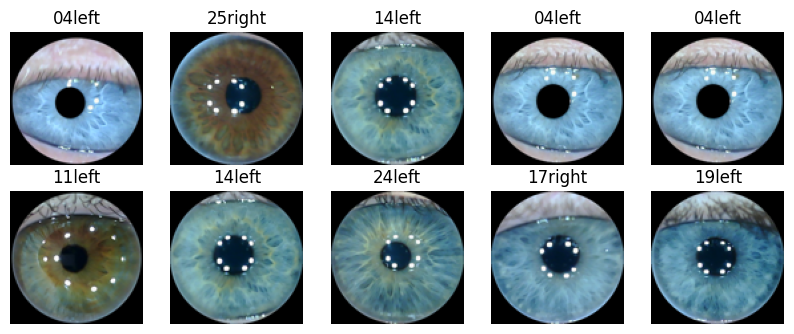


Выведем несколько картоник с метками из валидацианной выборки



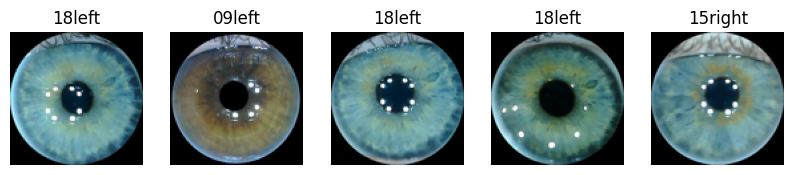

In [19]:
fig = plt.figure(figsize=(10,10))

for i in range(10):
    n = np.random.randint(0 , x_train.shape[0])
    img = x_train[n];
    ax = fig.add_subplot(5, 5, i+1);
    label = Dirs[np.argmax(y_train[n])];
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show();

print();
print("Выведем несколько картоник с метками из валидацианной выборки");
print();

fig = plt.figure(figsize=(10,10))

for i in range(5):
  n = np.random.randint(0 , x_val.shape[0])
  imageData = x_val[n];
  ax = fig.add_subplot(5, 5, i+1);
  label = Dirs[np.argmax(y_val[n])];
  ax.set_title(label)
  ax.imshow(imageData)
  ax.axis('off')
plt.show();

### Загрузим сохранённую ранее модель

In [20]:
from tensorflow.keras.models import load_model;

model = load_model('/content/saved_model.h5');

Так как при предыдущем обучении было 128 классов изображений, а при дообучении 50, необходимо изменить выходной слой по количеству классов.

Выведем предыдущую модель, а следом заменим выходной слой с новым колчеством классов.

In [21]:
model.summary();
model.pop();
model.add(Dense(NUM_CLASSES, activation='softmax'));
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 512)     14336     
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 512)    2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 256)       1179904   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 256)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

Теперь всё готово для дообучения модели. Проведём дообучение

Проведём обучение нейронной сети с сохранением историю обучения для отображения графика обучения

За основу возьмём 25 эпох обучения и количество элементов выборки до изменения вестов равным 50

In [22]:
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [23]:
model_hystory = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=50, epochs=25, verbose=1);

Epoch 1/25
8/8 [==============================] - 167s 21s/step - loss: 9.2433 - accuracy: 0.0775 - val_loss: 22.8610 - val_accuracy: 0.0000e+00
Epoch 2/25
8/8 [==============================] - 140s 17s/step - loss: 2.0557 - accuracy: 0.4700 - val_loss: 18.0003 - val_accuracy: 0.0000e+00
Epoch 3/25
8/8 [==============================] - 136s 17s/step - loss: 0.7602 - accuracy: 0.8075 - val_loss: 13.1882 - val_accuracy: 0.0250
Epoch 4/25
8/8 [==============================] - 139s 18s/step - loss: 0.2925 - accuracy: 0.9525 - val_loss: 8.4581 - val_accuracy: 0.1000
Epoch 5/25
8/8 [==============================] - 146s 18s/step - loss: 0.1217 - accuracy: 0.9850 - val_loss: 7.2355 - val_accuracy: 0.0750
Epoch 6/25
8/8 [==============================] - 139s 17s/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 4.5162 - val_accuracy: 0.2500
Epoch 7/25
8/8 [==============================] - 139s 17s/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 2.4721 - val_accuracy: 0.4250
Epoch 8/2

## Выведим результаты обучения в график

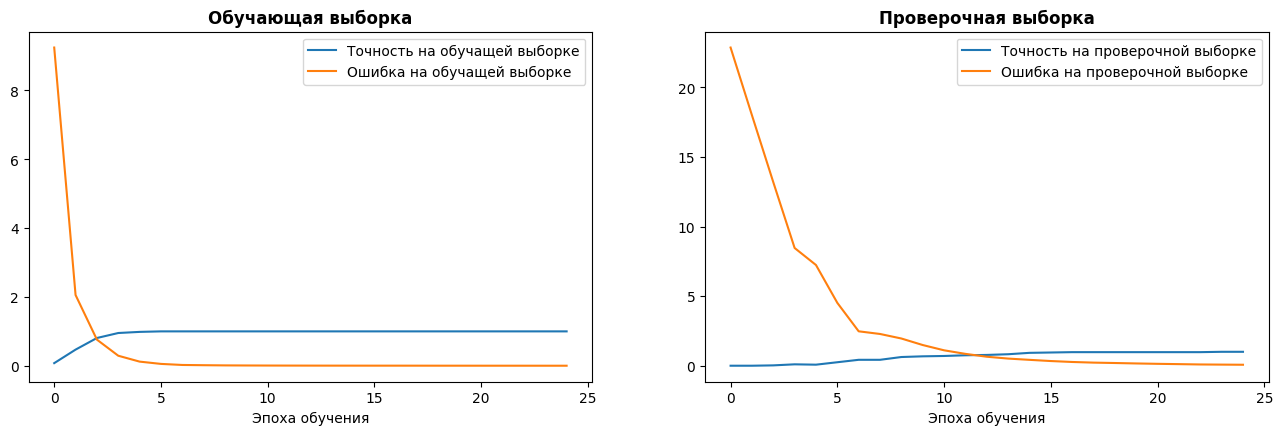

In [24]:
plt.figure(figsize=(16, 10));

plt.subplot(2, 2, 1);
plt.title('Обучающая выборка', fontweight='bold');
plt.plot(model_hystory.history['accuracy'], label='Точность на обучащей выборке');
plt.plot(model_hystory.history['loss'], label='Ошибка на обучащей выборке');
plt.xlabel('Эпоха обучения');
plt.legend()

plt.subplot(2, 2, 2);
plt.title('Проверочная выборка', fontweight='bold');
plt.plot(model_hystory.history['val_accuracy'], label='Точность на проверочной выборке');
plt.plot(model_hystory.history['val_loss'], label='Ошибка на проверочной выборке');
plt.xlabel('Эпоха обучения');
plt.legend();

plt.show();

## Проанализируем результаты обучения

По результатам обучения видно что точность на обучающей выборке начинает ощютимо возрастать примерно ко второй эпохе, а ошибка резко уменьшается. Что является непосредственным индекатором обучения сети.

На проверочной выборке мы видим что точность начинает увеличиваться примерно к шестой эпохе и к концу обучения достигает 100%. График ошибки на проверочной выборке стремится к минимуму и к концу обучения находится в своей минимальной точке.

Для наглядности выведим результаты разпознования из проверочной выборки детально.

In [25]:
predictions = np.argmax(model.predict(x_val), axis=1)
y_test_nums = np.argmax(y_val, axis=1)

for i in range(len(x_val)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

2/2 [==============================] - 5s 677ms/step
Предсказано - 56, было 56, True
Предсказано - 57, было 57, True
Предсказано - 55, было 55, True
Предсказано - 54, было 54, True
Предсказано - 54, было 54, True
Предсказано - 56, было 56, True
Предсказано - 54, было 54, True
Предсказано - 57, было 57, True
Предсказано - 57, было 57, True
Предсказано - 57, было 57, True
Предсказано - 53, было 53, True
Предсказано - 54, было 54, True
Предсказано - 53, было 53, True
Предсказано - 55, было 55, True
Предсказано - 55, было 55, True
Предсказано - 55, было 55, True
Предсказано - 56, было 56, True
Предсказано - 53, было 53, True
Предсказано - 54, было 54, True
Предсказано - 57, было 57, True
Предсказано - 56, было 56, True
Предсказано - 56, было 56, True
Предсказано - 56, было 56, True
Предсказано - 56, было 56, True
Предсказано - 54, было 54, True
Предсказано - 57, было 57, True
Предсказано - 55, было 55, True
Предсказано - 55, было 55, True
Предсказано - 53, было 53, True
Предсказано - 53, б

Из результатов вывода можно заметить что по всем изображениям из проверочной выборки обученая нейросеть ответила верно

Для более детального понимания верных ответов отобразим результат в матрице ошибок для  более детального анализа верный и не верных ответов

13/13 [==============================] - 34s 3s/step


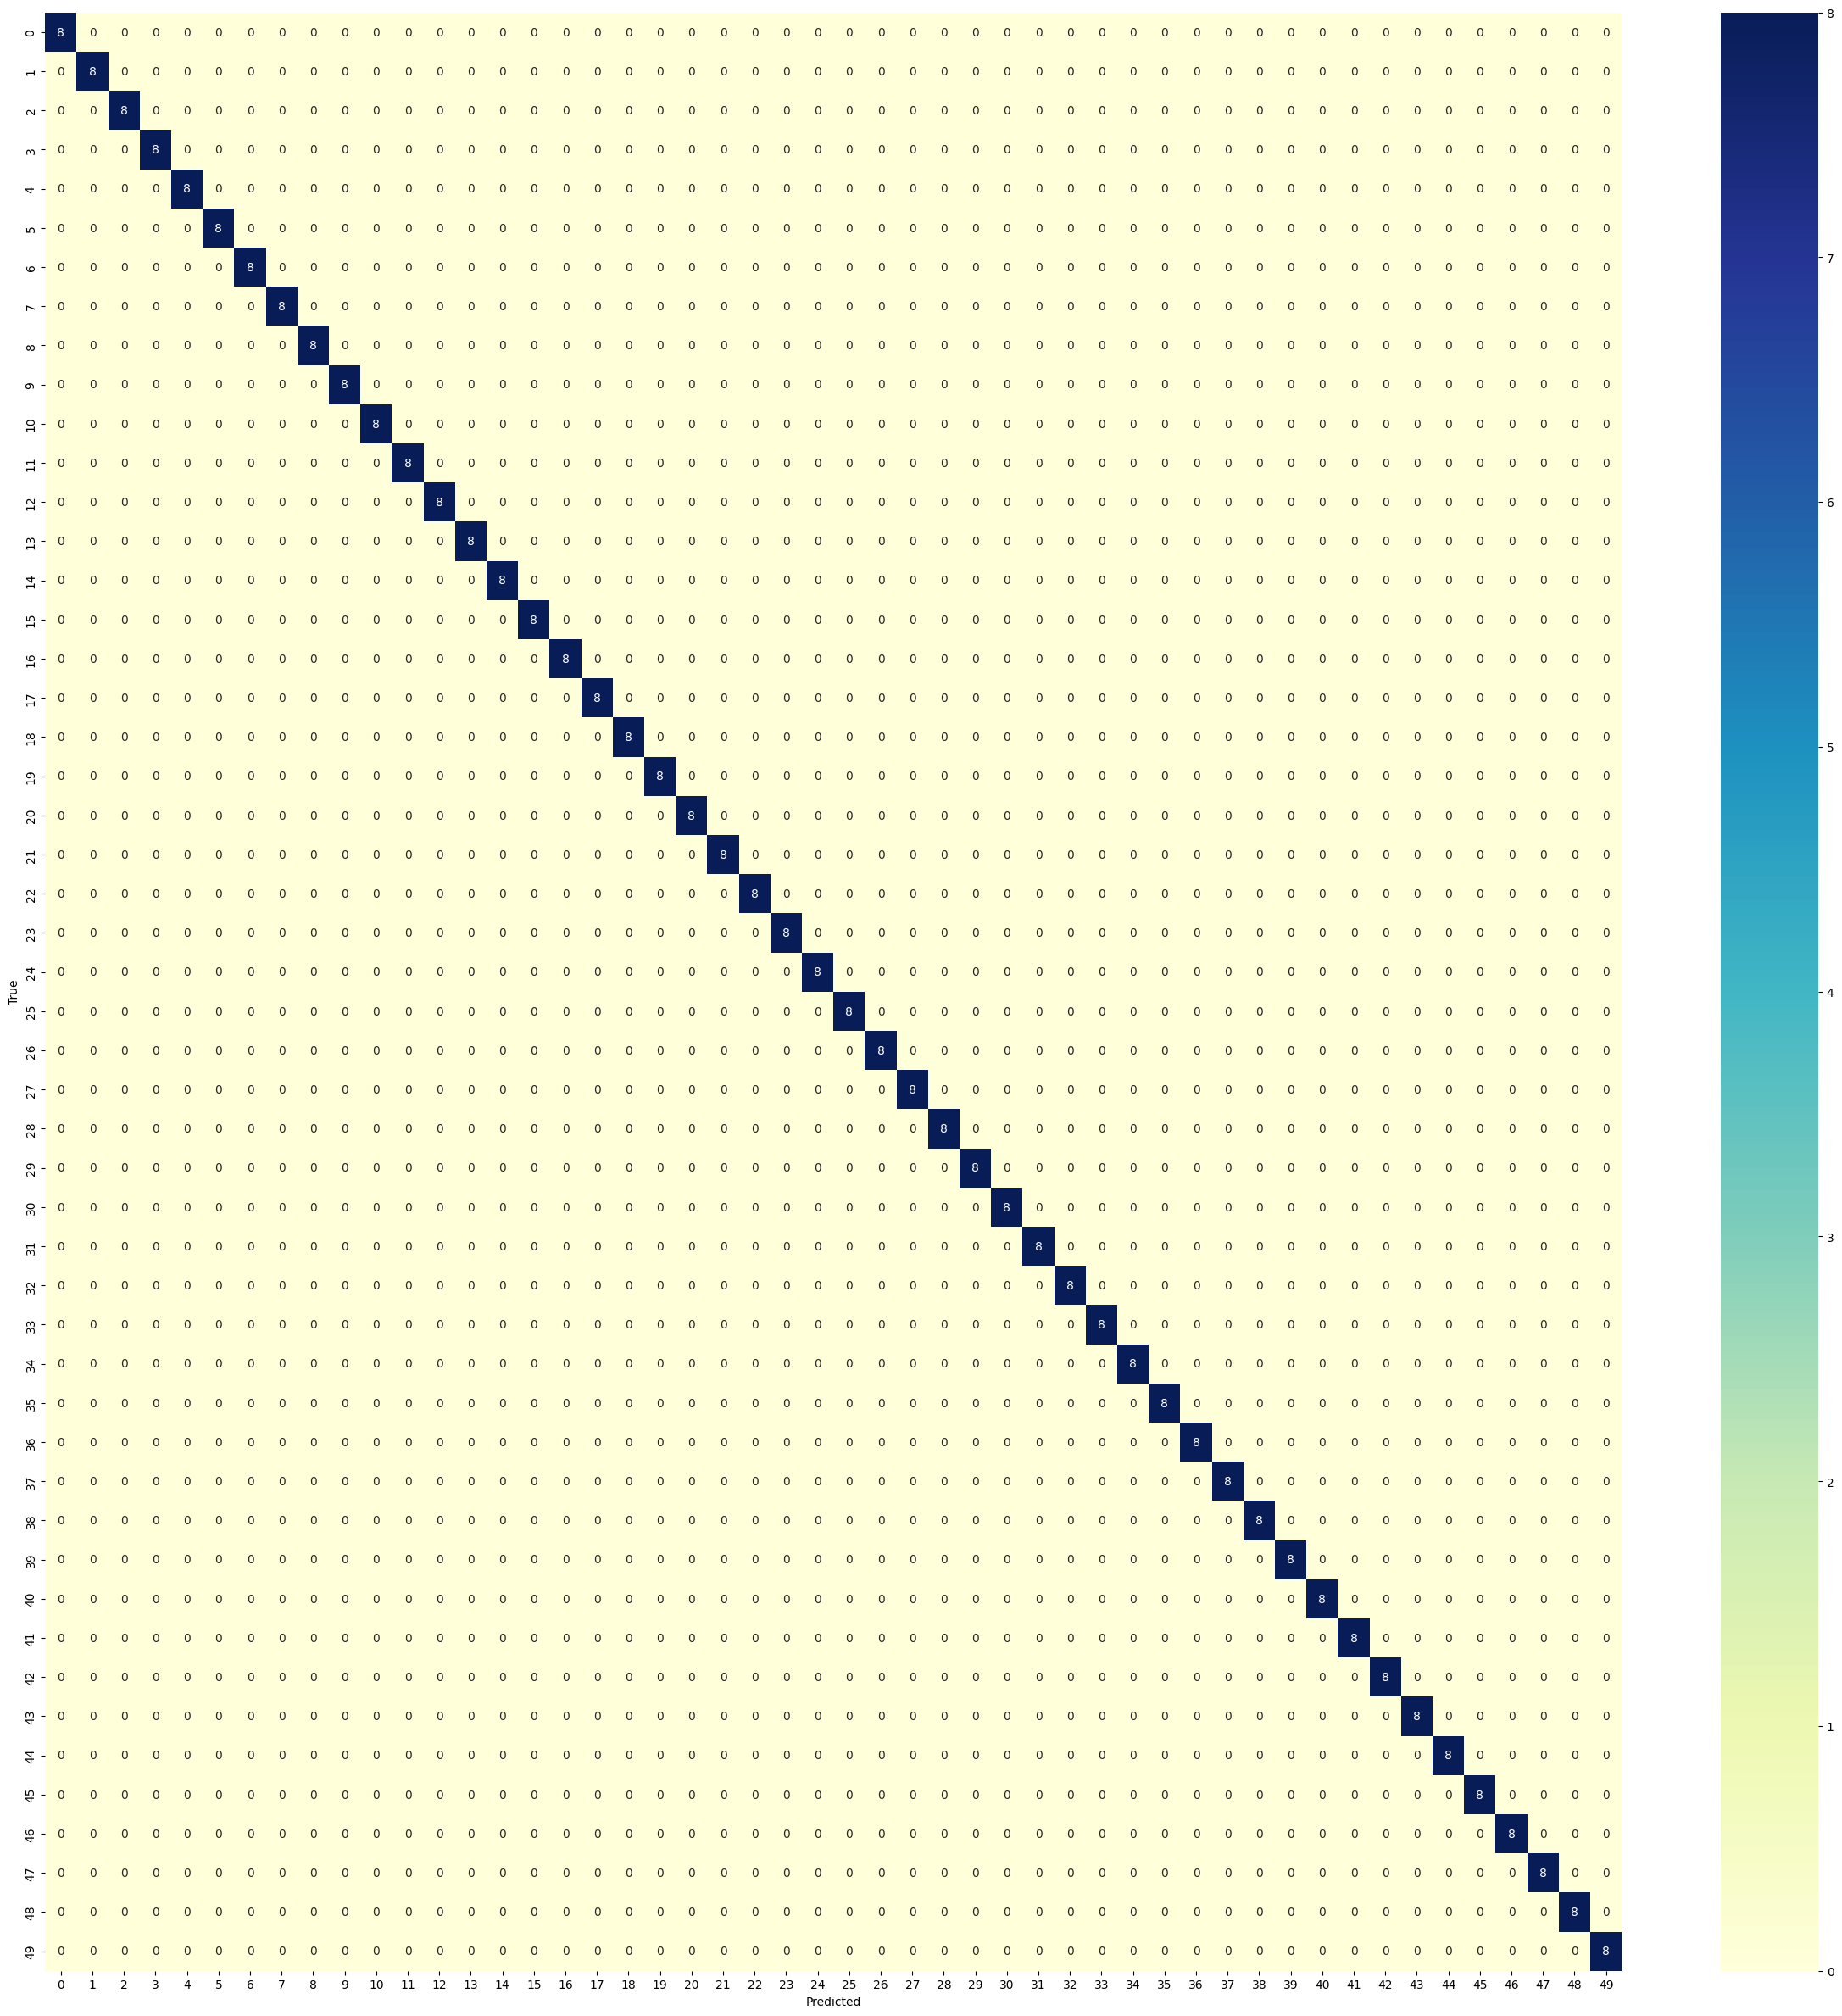

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

y_predict = model.predict(x_train);
y_test_classes = [tf.argmax(y_train[i]).numpy() for i in range(len(y_train))]
y_predict_classes = [tf.argmax(y_predict[i]).numpy() for i in range(len(y_predict))]

plt.figure(figsize=(30,30))
confusion_mtx = confusion_matrix(y_test_classes, y_predict_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Из результатов матрицы ошибок видно что нейросеть во всех случаях предсказывает верные результаты.

А значит задача может считаться выполненой.

**Спасибо за внимание.**